In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
veri = pd.read_csv("C:\\Users\\90545\\OneDrive\\Masaüstü\\LESSONS\\banana_quality_dataset.csv")
veri.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


In [3]:
sorted_veri = veri.sort_values(by="quality_score", ascending=False)

In [4]:
sorted_veri

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
906,907,Lady Finger,Costa Rica,3.89,Premium,6.75,Overripe,21.81,2.81,29.32,155.97,2023-09-11,6.2,195.5,2276.0,170.5
754,755,Lady Finger,Costa Rica,3.78,Premium,6.86,Overripe,21.42,1.72,27.23,234.73,2023-10-16,2.0,370.8,2915.7,52.1
88,89,Plantain,Honduras,3.77,Premium,6.95,Overripe,20.75,3.12,26.99,178.06,2023-10-28,14.8,464.8,1104.1,52.9
815,816,Burro,India,3.75,Premium,6.81,Overripe,20.40,3.10,28.70,89.63,2023-10-19,4.4,773.9,2418.6,142.4
553,554,Plantain,Brazil,3.74,Premium,6.31,Overripe,21.63,2.77,27.72,183.76,2023-10-16,2.2,697.3,1826.4,131.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,Fehi,Ecuador,1.16,Unripe,1.96,Green,15.48,4.49,12.20,161.63,2023-09-14,19.0,157.0,2620.9,20.4
780,781,Cavendish,Colombia,1.14,Unripe,1.23,Green,15.35,2.30,11.36,190.89,2023-10-14,8.4,683.3,1286.2,79.4
417,418,Lady Finger,Guatemala,1.12,Unripe,1.73,Green,15.27,3.44,10.48,133.66,2023-09-21,18.5,272.7,2141.4,60.2
297,298,Manzano,Ecuador,1.12,Unripe,1.63,Green,15.26,0.83,13.03,183.00,2023-09-19,3.5,731.2,2288.8,162.3


In [5]:
unique_regions = veri['region'].nunique()
unique_regions

8

In [6]:
region_quality_avg = veri.groupby('region')['quality_score'].mean()
region_quality_avg

region
Brazil         2.505096
Colombia       2.459338
Costa Rica     2.516231
Ecuador        2.387299
Guatemala      2.457778
Honduras       2.498505
India          2.476541
Philippines    2.437717
Name: quality_score, dtype: float64

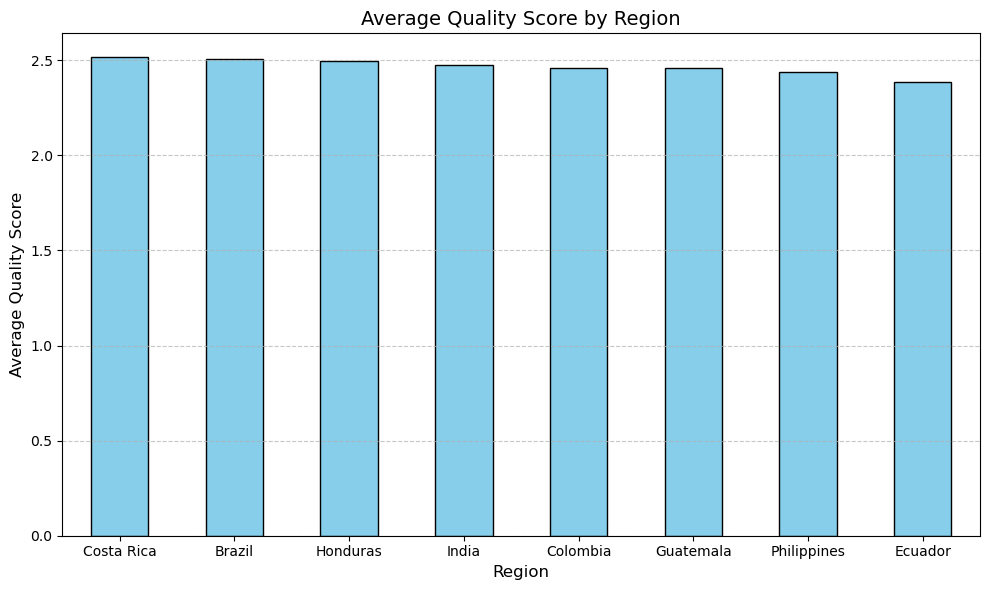

In [7]:
plt.figure(figsize=(10, 6))
region_quality_avg.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Quality Score by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Quality Score', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

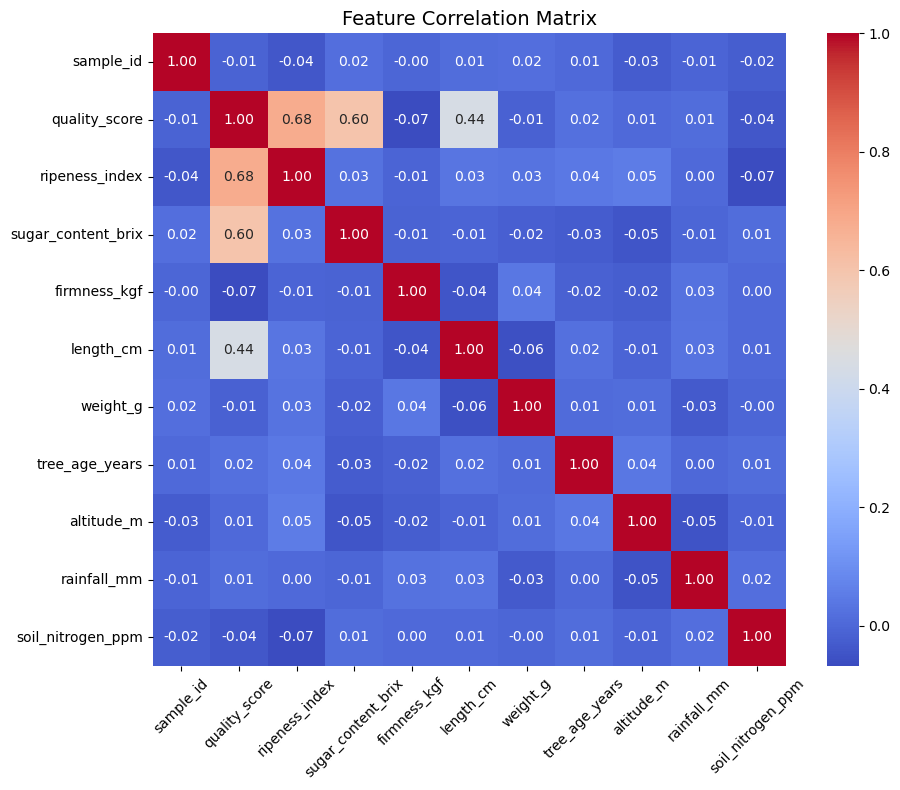

In [8]:
numeric_data = veri.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

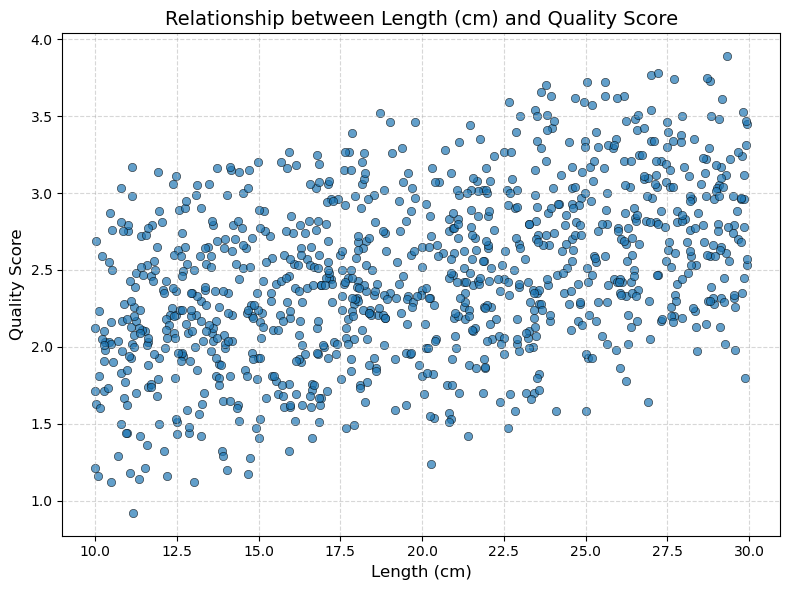

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=veri, x='length_cm', y='quality_score', alpha=0.7, edgecolor='k')
plt.title('Relationship between Length (cm) and Quality Score', fontsize=14)
plt.xlabel('Length (cm)', fontsize=12)
plt.ylabel('Quality Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

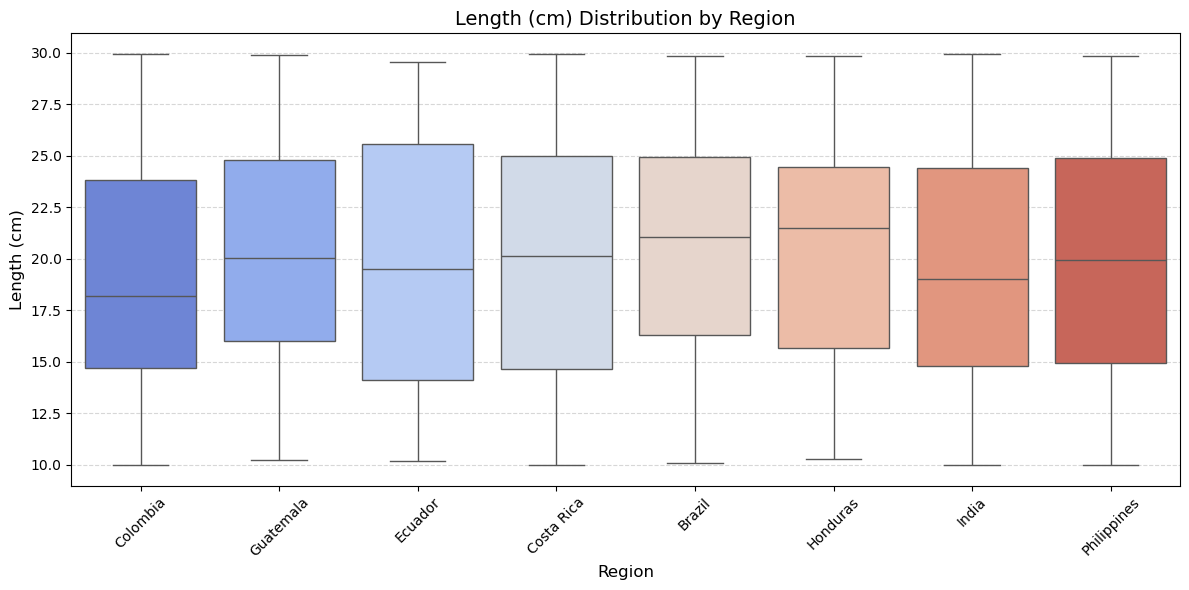

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=veri, x='region', y='length_cm', palette='coolwarm')
plt.title('Length (cm) Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Length (cm)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


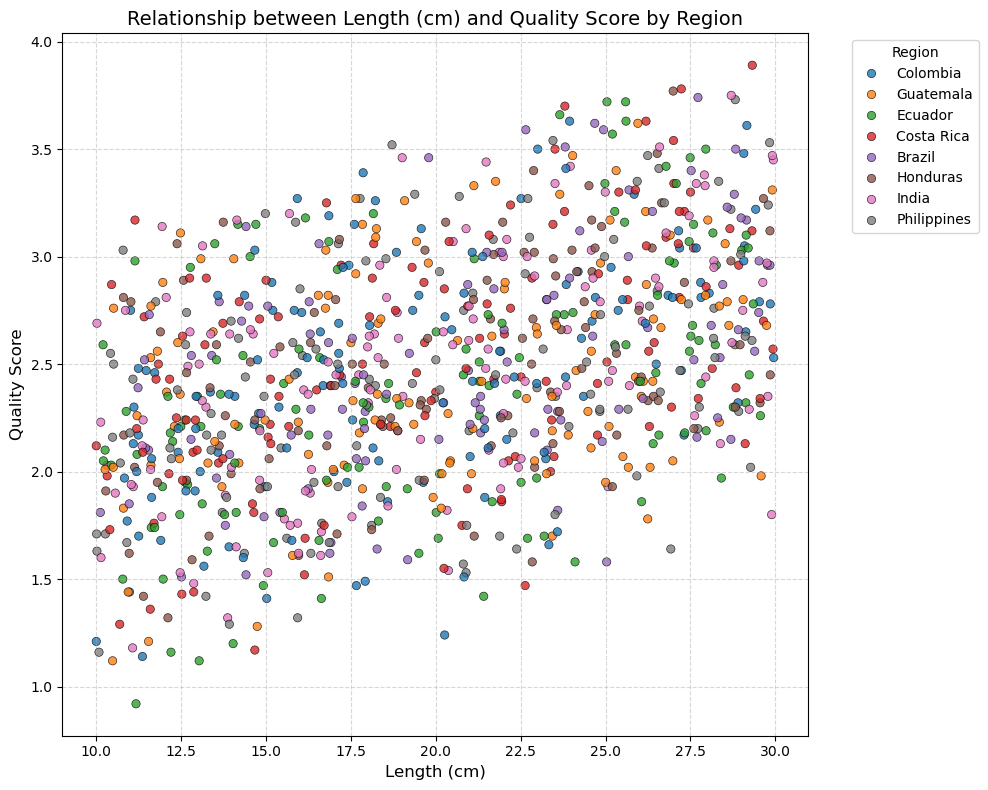

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=veri,
    x='length_cm',
    y='quality_score',
    hue='region',  
    palette='tab10',  
    alpha=0.8,
    edgecolor='k'
)
plt.title('Relationship between Length (cm) and Quality Score by Region', fontsize=14)
plt.xlabel('Length (cm)', fontsize=12)
plt.ylabel('Quality Score', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend konumunu ayarlama
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

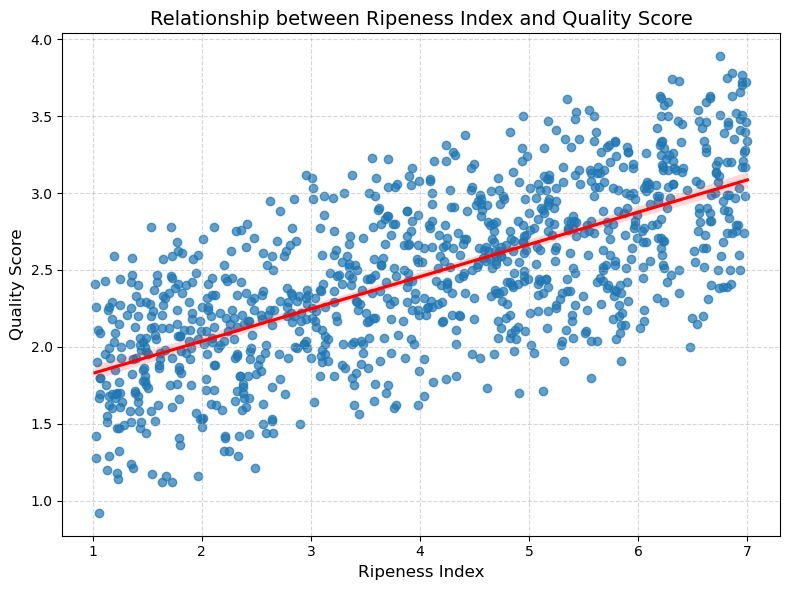

In [12]:
plt.figure(figsize=(8, 6))
sns.regplot(data=veri, x='ripeness_index', y='quality_score', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Relationship between Ripeness Index and Quality Score', fontsize=14)
plt.xlabel('Ripeness Index', fontsize=12)
plt.ylabel('Quality Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


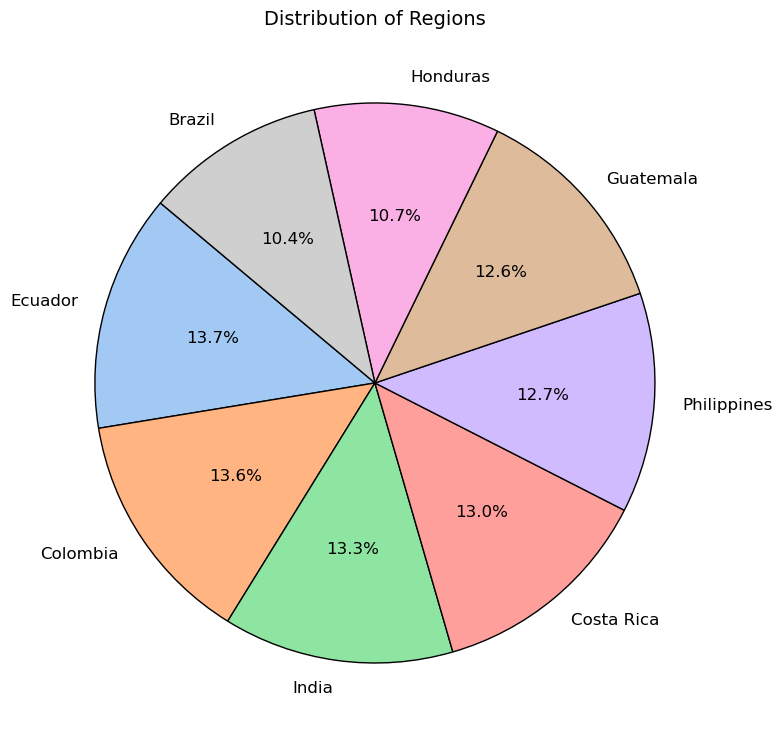

In [13]:
region_counts = veri['region'].value_counts()
plt.figure(figsize=(8, 8))
region_counts.plot.pie(
    autopct='%1.1f%%',  
    startangle=140,     
    colors=sns.color_palette('pastel'),  
    wedgeprops={'edgecolor': 'black'},  
    textprops={'fontsize': 12}          
)
plt.title('Distribution of Regions', fontsize=14)
plt.ylabel('')  
plt.tight_layout()
plt.show()

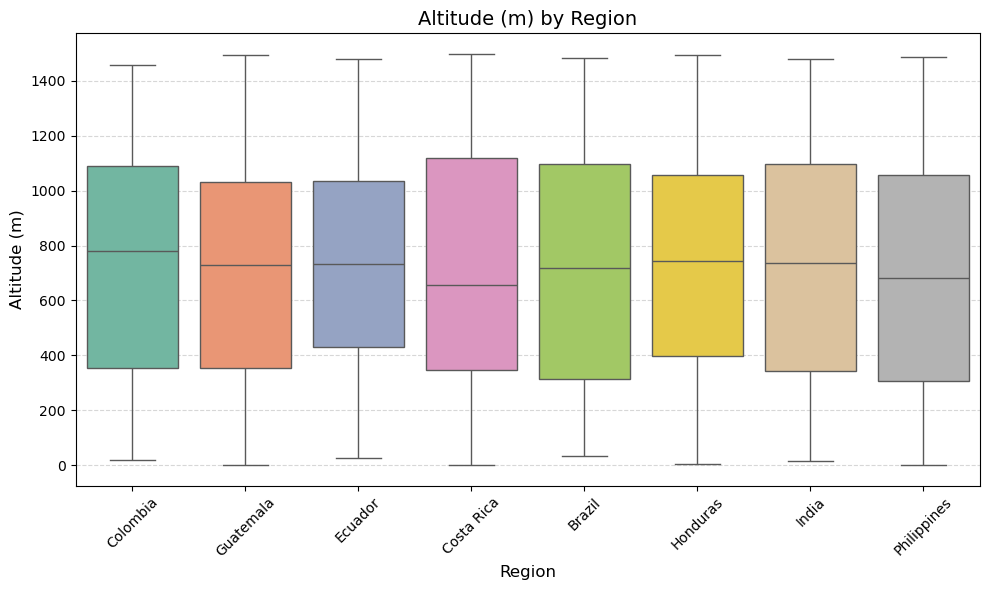

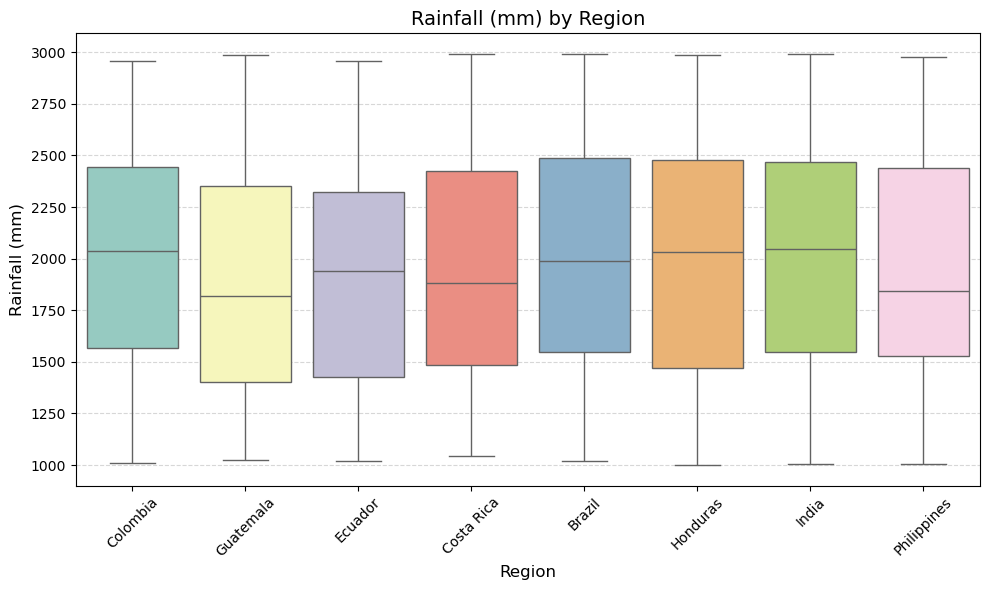

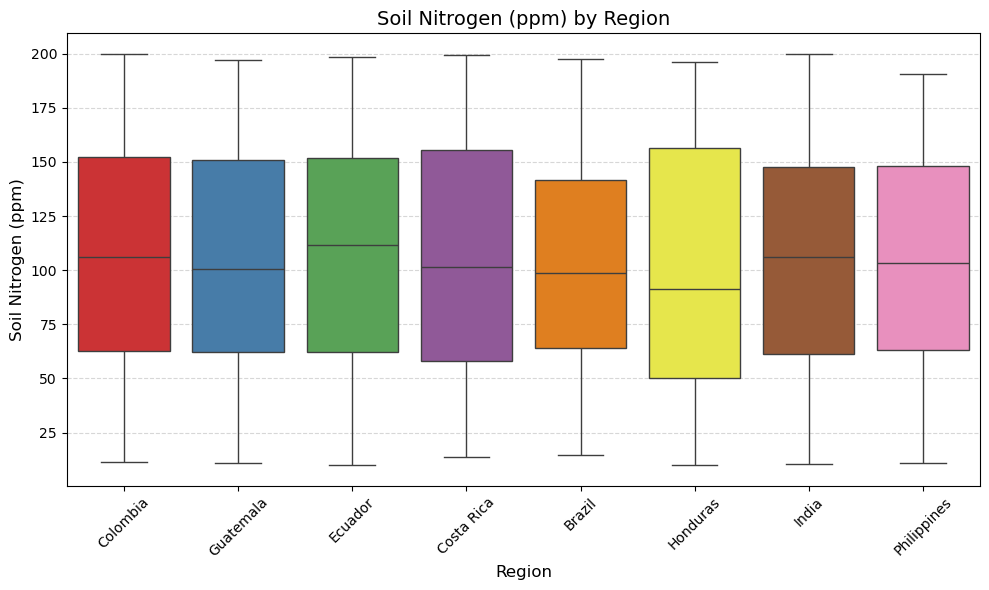

In [14]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=veri, x='region', y='altitude_m', palette='Set2')
plt.title('Altitude (m) by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Altitude (m)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=veri, x='region', y='rainfall_mm', palette='Set3')
plt.title('Rainfall (mm) by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=veri, x='region', y='soil_nitrogen_ppm', palette='Set1')
plt.title('Soil Nitrogen (ppm) by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Soil Nitrogen (ppm)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

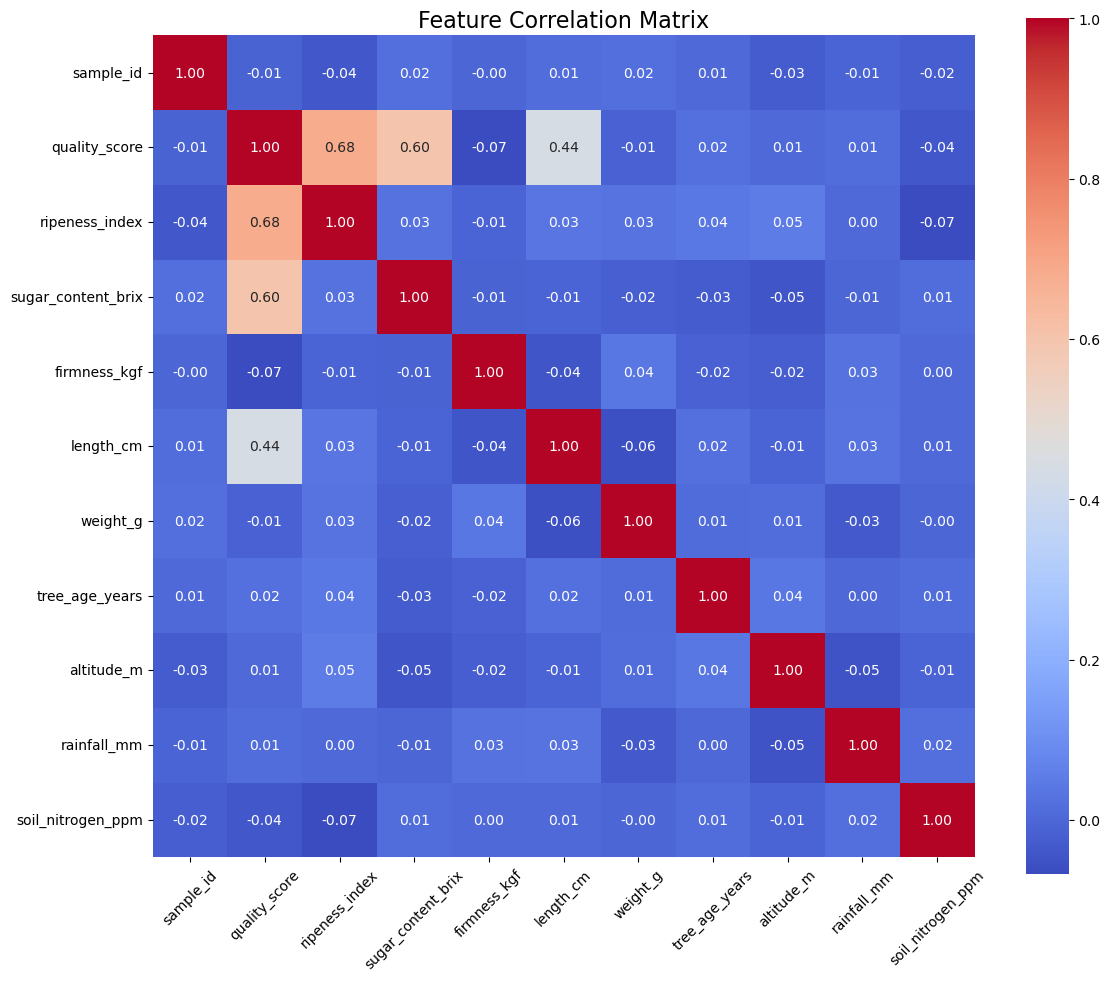

In [15]:

numeric_data = veri.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [16]:
regions = veri["region"].unique()

region_tables = {}
for region in regions:
    region_data = veri[veri["region"] == region]
    region_tables[region] = region_data


for region, table in region_tables.items():
    print(f"Region: {region}")
    display(table.head())  
    print("\n" + "="*50 + "\n")

Region: Colombia


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
12,13,Red Dacca,Colombia,3.63,Premium,6.66,Overripe,21.35,1.88,23.94,171.01,2023-10-10,19.6,419.5,2273.4,25.9
15,16,Burro,Colombia,2.75,Good,6.55,Overripe,17.88,2.00,15.20,116.00,2023-09-10,15.6,1298.5,2544.5,24.1
25,26,Blue Java,Colombia,2.50,Processing,3.85,Turning,16.82,2.18,26.49,169.69,2023-09-04,6.7,740.0,1812.2,82.6
33,34,Lady Finger,Colombia,2.78,Good,1.72,Green,21.80,0.96,29.85,182.10,2023-09-27,6.2,880.2,1218.6,168.3




Region: Guatemala


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
20,21,Blue Java,Guatemala,3.09,Good,5.18,Ripe,21.74,1.79,18.23,193.38,2023-09-29,9.5,826.0,1995.7,61.8
30,31,Burro,Guatemala,1.70,Processing,1.22,Green,16.39,1.40,23.43,131.47,2023-10-24,13.2,1000.1,1707.0,76.2
37,38,Cavendish,Guatemala,2.44,Processing,5.35,Ripe,16.06,4.91,25.88,244.87,2023-09-26,17.7,672.9,2710.2,170.8
42,43,Lady Finger,Guatemala,2.22,Processing,2.91,Turning,18.66,1.01,19.35,112.64,2023-09-07,9.7,969.1,1082.0,195.5




Region: Ecuador


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7
21,22,Burro,Ecuador,2.20,Processing,2.78,Turning,18.92,2.45,14.81,154.02,2023-09-17,17.4,1225.2,2683.6,175.6
32,33,Plantain,Ecuador,1.74,Processing,2.38,Turning,18.25,3.88,11.62,175.95,2023-09-27,16.2,878.7,1491.3,79.1




Region: Costa Rica


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
5,6,Fehi,Costa Rica,2.72,Good,4.95,Ripe,20.32,4.25,15.36,94.98,2023-10-06,19.3,565.2,1727.5,74.7
7,8,Burro,Costa Rica,3.06,Good,6.10,Overripe,20.44,0.55,18.17,224.08,2023-10-27,3.3,0.4,1514.7,119.9
10,11,Red Dacca,Costa Rica,1.29,Unripe,2.33,Turning,15.24,2.97,10.69,108.13,2023-09-04,16.5,375.7,2678.8,64.5
11,12,Manzano,Costa Rica,2.50,Processing,6.93,Overripe,15.44,1.79,17.84,200.12,2023-09-01,16.7,1208.9,1896.3,79.7
14,15,Fehi,Costa Rica,2.90,Good,5.23,Ripe,18.73,3.30,22.83,113.40,2023-09-20,10.2,756.4,2354.1,58.2




Region: Brazil


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
6,7,Burro,Brazil,2.44,Processing,5.15,Ripe,18.15,4.58,17.22,212.06,2023-09-04,11.3,800.3,2513.1,67.2
8,9,Manzano,Brazil,1.82,Processing,2.50,Turning,15.46,3.53,23.59,110.91,2023-10-05,13.3,361.9,2387.0,104.6
59,60,Burro,Brazil,2.96,Good,4.77,Ripe,18.82,4.78,29.84,138.99,2023-09-23,17.0,1366.2,2103.7,48.2
83,84,Fehi,Brazil,3.59,Premium,6.27,Overripe,21.36,3.14,24.94,120.77,2023-09-27,6.6,726.3,1211.0,153.4
90,91,Fehi,Brazil,3.62,Premium,6.66,Overripe,20.43,2.53,24.68,86.20,2023-09-29,9.5,136.4,2725.4,92.3




Region: Honduras


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
9,10,Lady Finger,Honduras,2.02,Processing,3.94,Turning,18.41,0.73,11.13,153.16,2023-09-02,6.6,312.3,1079.4,120.1
18,19,Fehi,Honduras,2.19,Processing,6.49,Overripe,15.15,0.81,15.95,175.16,2023-09-10,11.8,534.6,1912.7,17.4
24,25,Plantain,Honduras,2.99,Good,6.67,Overripe,17.93,0.75,23.46,238.13,2023-10-27,3.6,905.7,1460.2,108.4
31,32,Cavendish,Honduras,2.58,Good,4.58,Ripe,18.96,2.38,15.41,170.52,2023-10-13,8.4,426.4,2284.4,144.9
36,37,Plantain,Honduras,2.32,Processing,3.04,Turning,15.80,2.44,29.55,184.92,2023-09-02,14.8,397.5,1542.8,30.4




Region: India


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
13,14,Red Dacca,India,1.32,Unripe,1.24,Green,15.97,2.09,13.87,188.00,2023-09-29,11.0,287.3,1442.5,19.9
17,18,Fehi,India,3.38,Good,4.41,Ripe,21.30,2.32,27.91,134.75,2023-09-23,11.8,117.8,2235.5,164.5
27,28,Lady Finger,India,3.05,Good,6.07,Overripe,21.87,3.39,13.13,88.98,2023-09-04,4.3,1476.5,1455.3,31.8
39,40,Red Dacca,India,2.10,Processing,2.89,Turning,16.76,2.83,21.56,236.84,2023-10-08,17.6,995.4,2946.1,50.2
45,46,Plantain,India,2.81,Good,4.70,Ripe,20.06,3.67,18.55,182.42,2023-10-02,15.7,574.6,1201.5,15.7




Region: Philippines


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
16,17,Plantain,Philippines,2.20,Processing,2.08,Turning,17.43,3.80,27.72,87.05,2023-09-28,4.4,362.0,1946.4,29.7
22,23,Lady Finger,Philippines,3.54,Premium,6.55,Overripe,21.56,3.58,23.45,242.03,2023-10-24,17.4,1439.4,2602.7,102.1
23,24,Fehi,Philippines,2.84,Good,6.83,Overripe,15.37,2.00,26.52,202.27,2023-09-28,3.8,1189.0,1821.0,68.1
26,27,Blue Java,Philippines,2.98,Good,6.17,Overripe,20.12,4.75,17.94,124.01,2023-09-03,17.7,60.1,2652.4,117.2
35,36,Burro,Philippines,2.96,Good,5.18,Ripe,17.45,1.74,29.77,144.56,2023-09-28,6.2,1254.2,1197.9,146.7


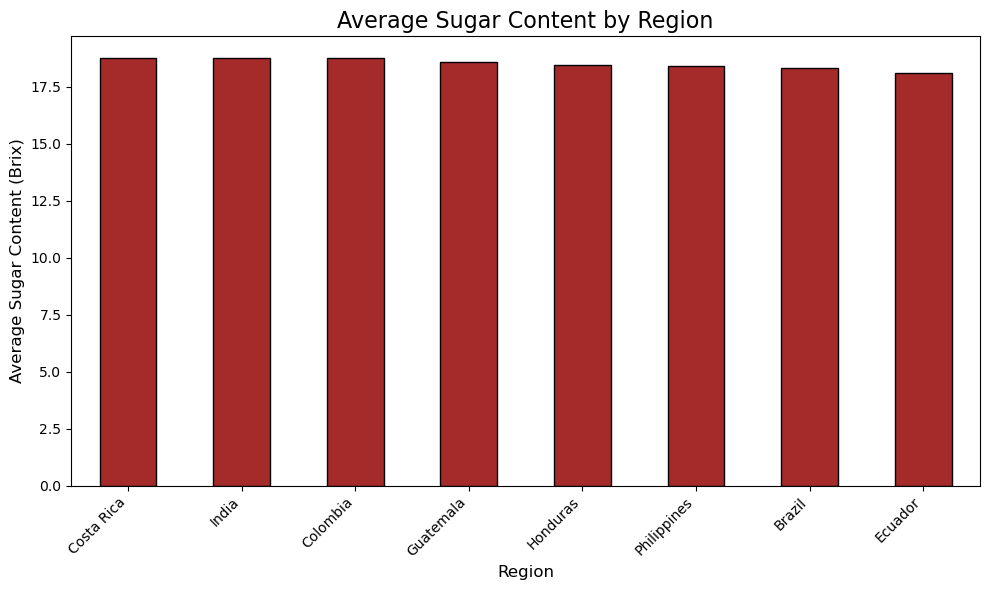

In [17]:
import matplotlib.pyplot as plt


sugar_content_means = veri.groupby("region")["sugar_content_brix"].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sugar_content_means.plot(kind="bar", color="brown", edgecolor="black")
plt.title("Average Sugar Content by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Sugar Content (Brix)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


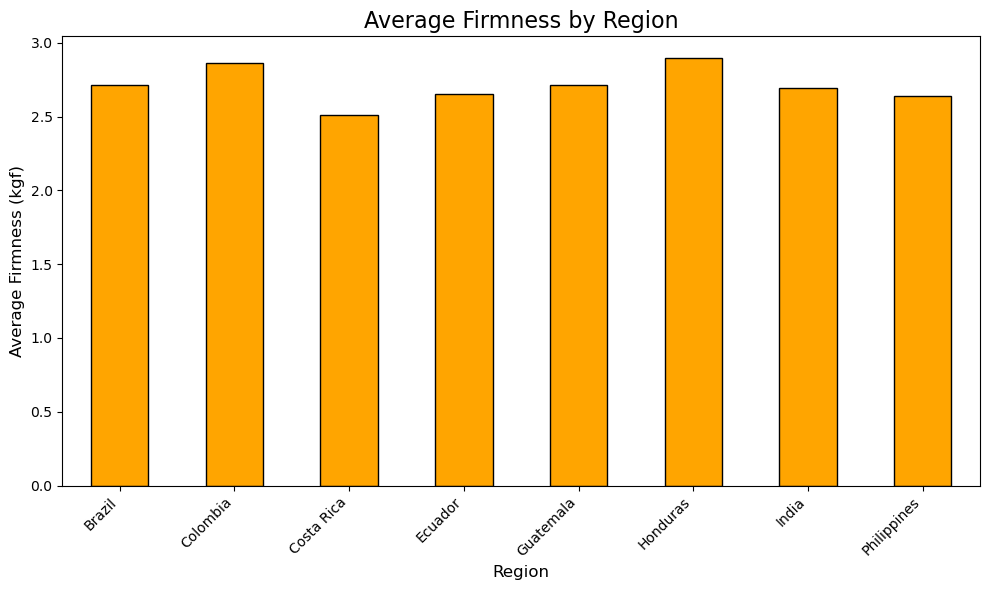

In [18]:
import matplotlib.pyplot as plt


firmness_means = veri.groupby("region")["firmness_kgf"].mean()


plt.figure(figsize=(10, 6))
firmness_means.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average Firmness by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Firmness (kgf)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


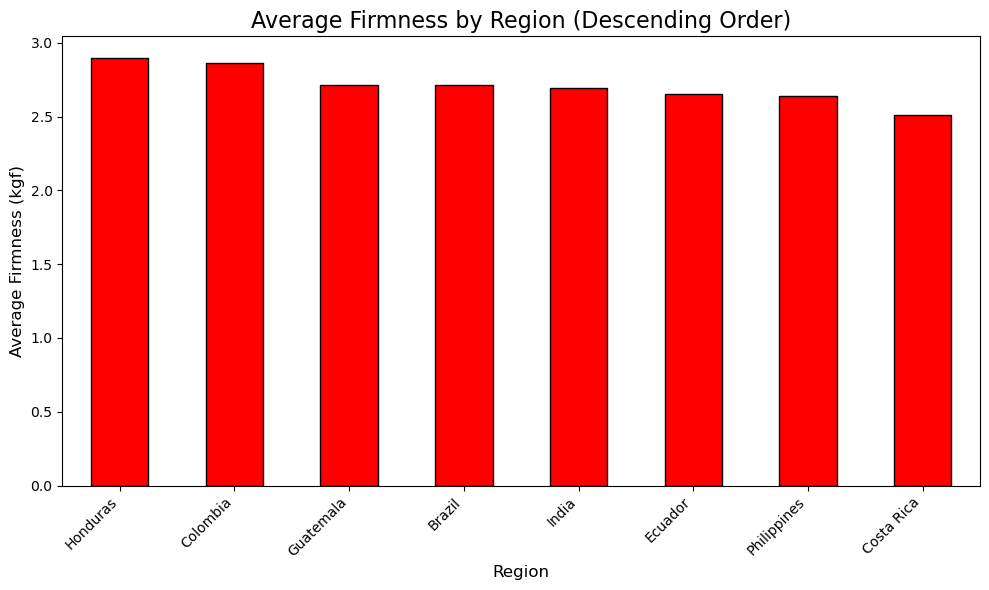

In [19]:
import matplotlib.pyplot as plt


firmness_means = veri.groupby("region")["firmness_kgf"].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
firmness_means.plot(kind="bar", color="red", edgecolor="black")
plt.title("Average Firmness by Region (Descending Order)", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Firmness (kgf)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


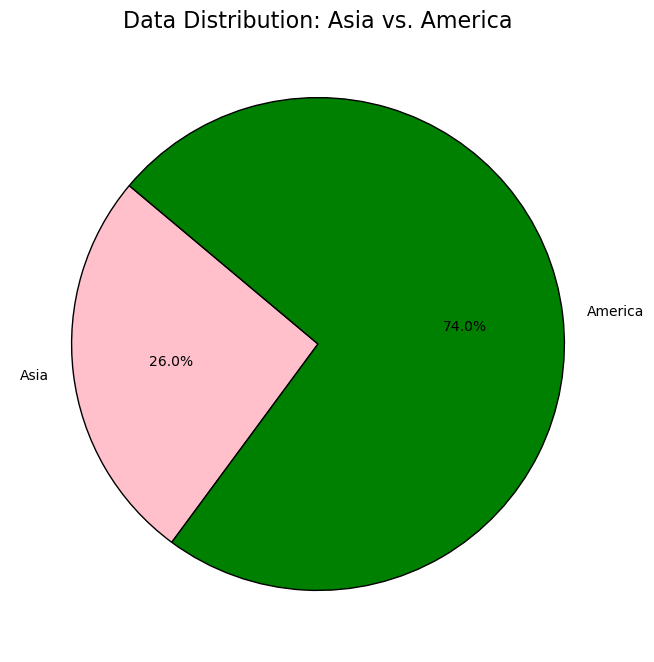

In [20]:
import matplotlib.pyplot as plt


asia_regions = ["India", "Philippines"]  
america_regions = ["Colombia", "Guatemala", "Ecuador", "Costa Rica", "Brazil", "Honduras"]  # Amerika bölgeleri


region_counts = {
    "Asia": veri[veri["region"].isin(asia_regions)].shape[0],
    "America": veri[veri["region"].isin(america_regions)].shape[0],
}


plt.figure(figsize=(8, 8))
plt.pie(
    region_counts.values(),
    labels=region_counts.keys(),
    autopct="%1.1f%%",
    colors=["pink", "green"],
    startangle=140,
    wedgeprops={"edgecolor": "black"},
)
plt.title("Data Distribution: Asia vs. America", fontsize=16)
plt.show()


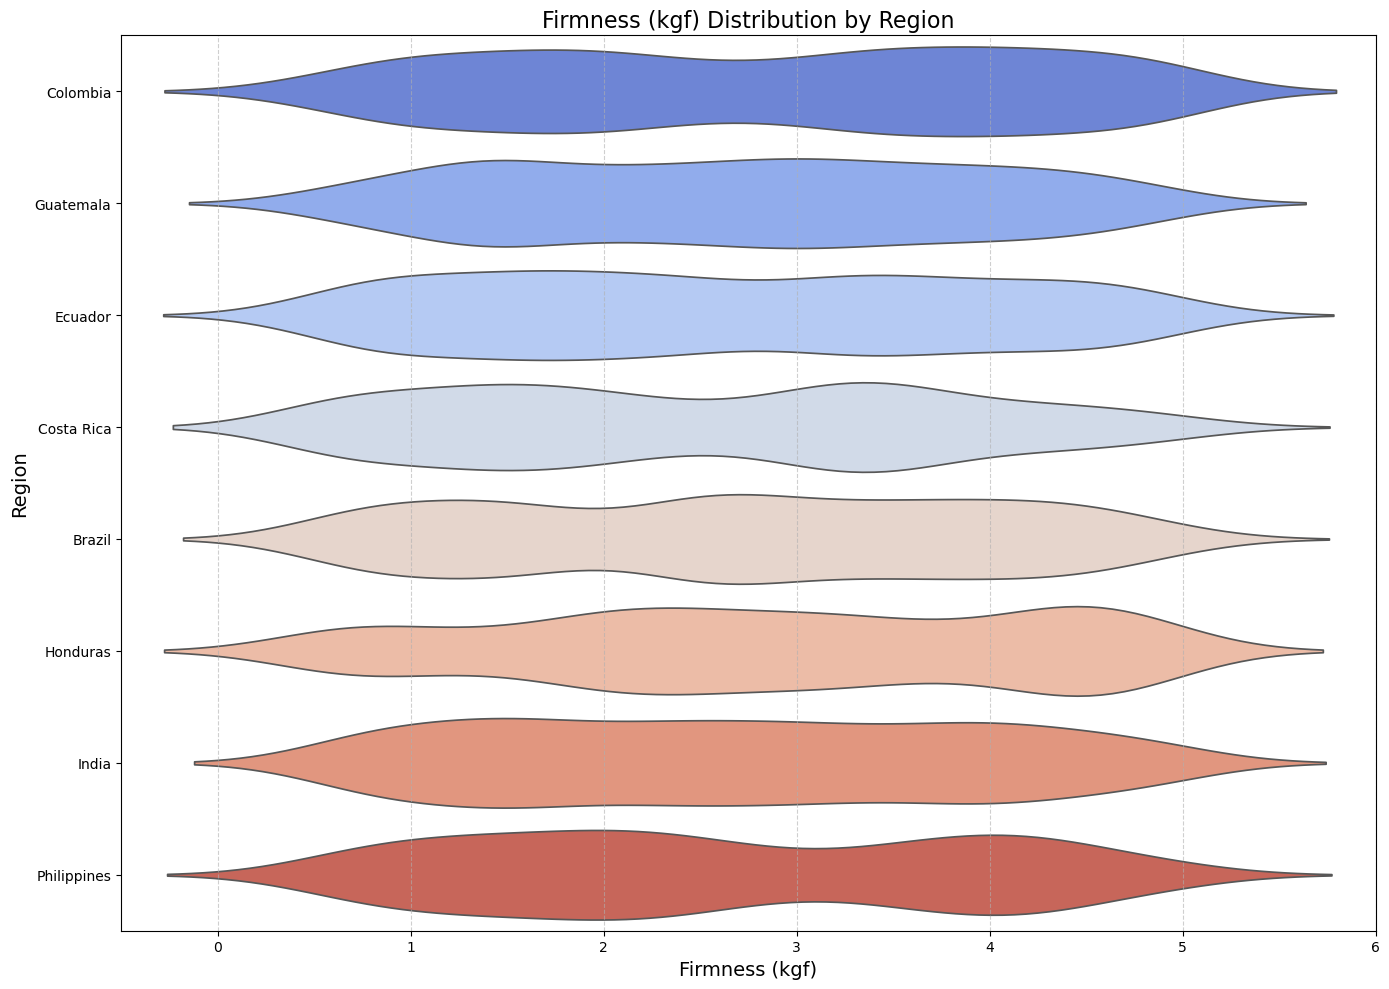

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))
sns.violinplot(
    x='firmness_kgf',
    y='region',
    data=veri,
    scale='width', 
    bw=0.3,  
    inner=None,  
    palette='coolwarm'
)


plt.xlim(veri['firmness_kgf'].min() - 1, veri['firmness_kgf'].max() + 1)


plt.title("Firmness (kgf) Distribution by Region", fontsize=16)
plt.xlabel("Firmness (kgf)", fontsize=14)
plt.ylabel("Region", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()


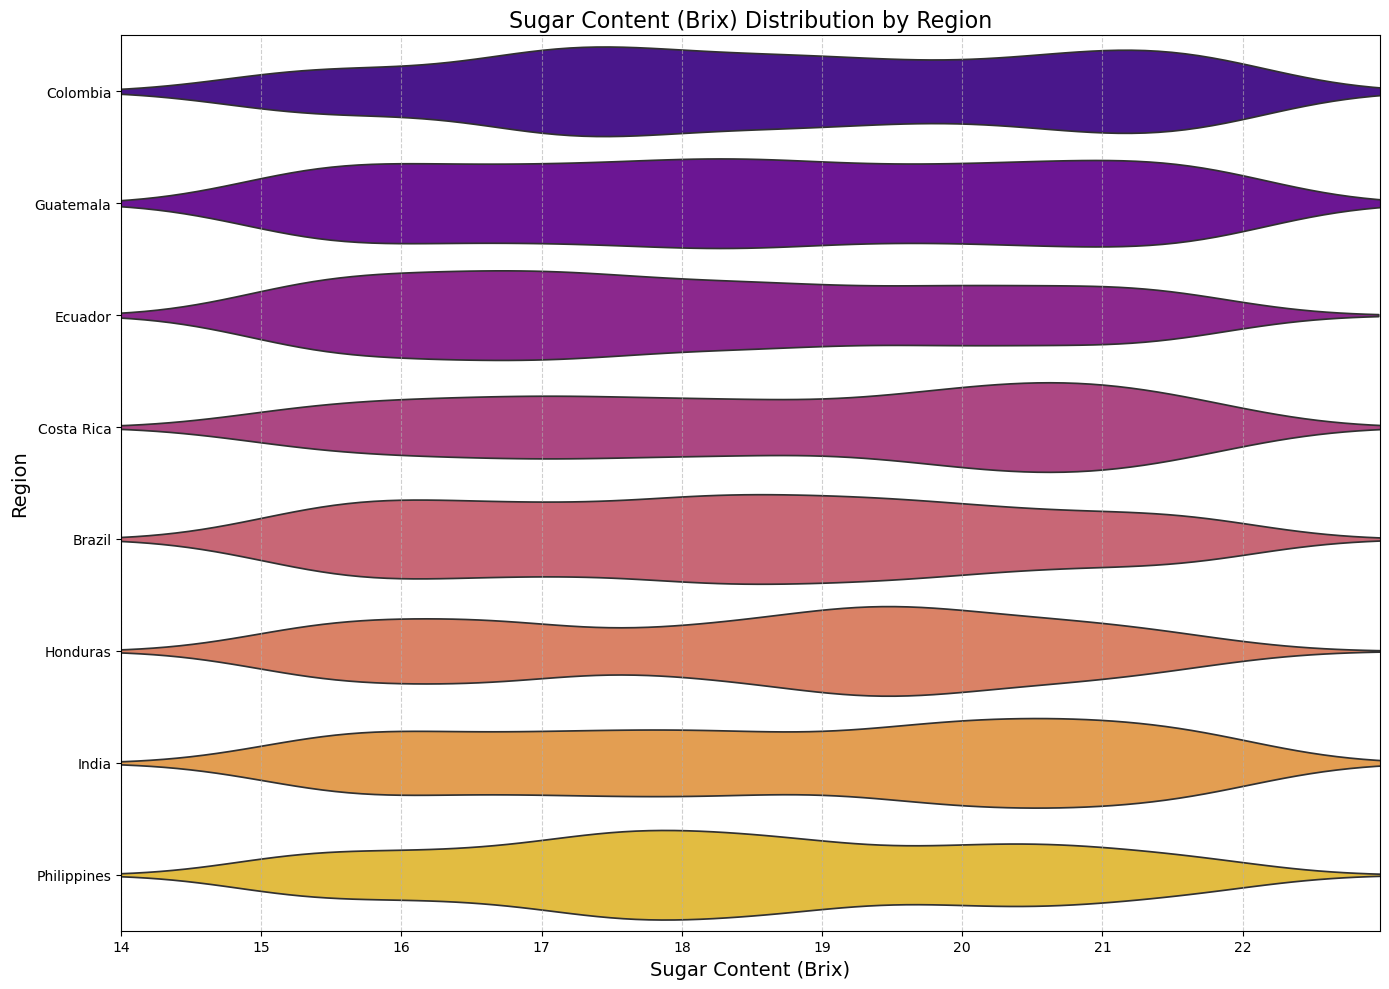

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))  
sns.violinplot(
    x='sugar_content_brix',
    y='region',
    data=veri,
    scale='width',  
    bw=0.3,  
    inner=None,  
    palette='plasma'
)


plt.xlim(veri['sugar_content_brix'].min() - 1, veri['sugar_content_brix'].max() + 1)


plt.title("Sugar Content (Brix) Distribution by Region", fontsize=16)
plt.xlabel("Sugar Content (Brix)", fontsize=14)
plt.ylabel("Region", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.tight_layout()


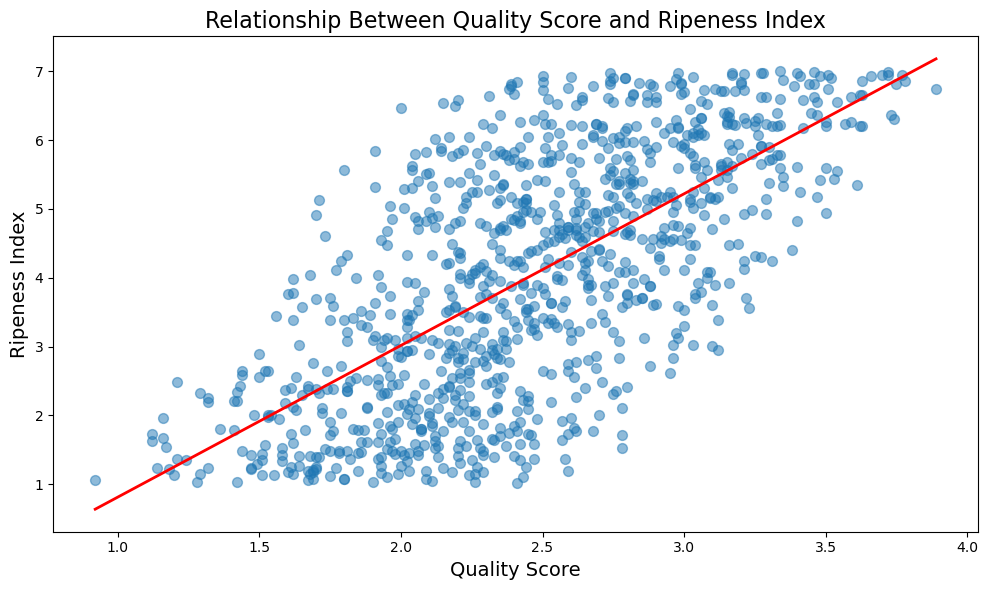

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.regplot(
    x='quality_score', 
    y='ripeness_index', 
    data=veri, 
    scatter_kws={'s': 50, 'alpha': 0.5},  
    line_kws={'color': 'red', 'lw': 2},    
    ci=None  
)

plt.title("Relationship Between Quality Score and Ripeness Index", fontsize=16)
plt.xlabel("Quality Score", fontsize=14)
plt.ylabel("Ripeness Index", fontsize=14)


plt.tight_layout()
plt.show()


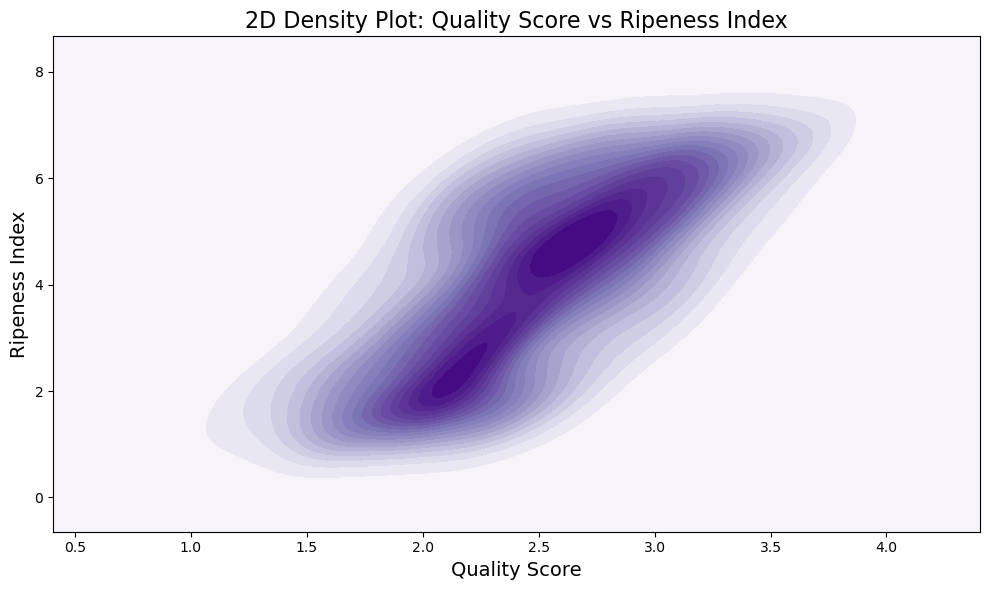

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.kdeplot(
    x='quality_score', 
    y='ripeness_index', 
    data=veri, 
    cmap='Purples',  
    fill=True,     
    thresh=0,      
    levels=20    
)


plt.title("2D Density Plot: Quality Score vs Ripeness Index", fontsize=16)
plt.xlabel("Quality Score", fontsize=14)
plt.ylabel("Ripeness Index", fontsize=14)


plt.tight_layout()
plt.show()


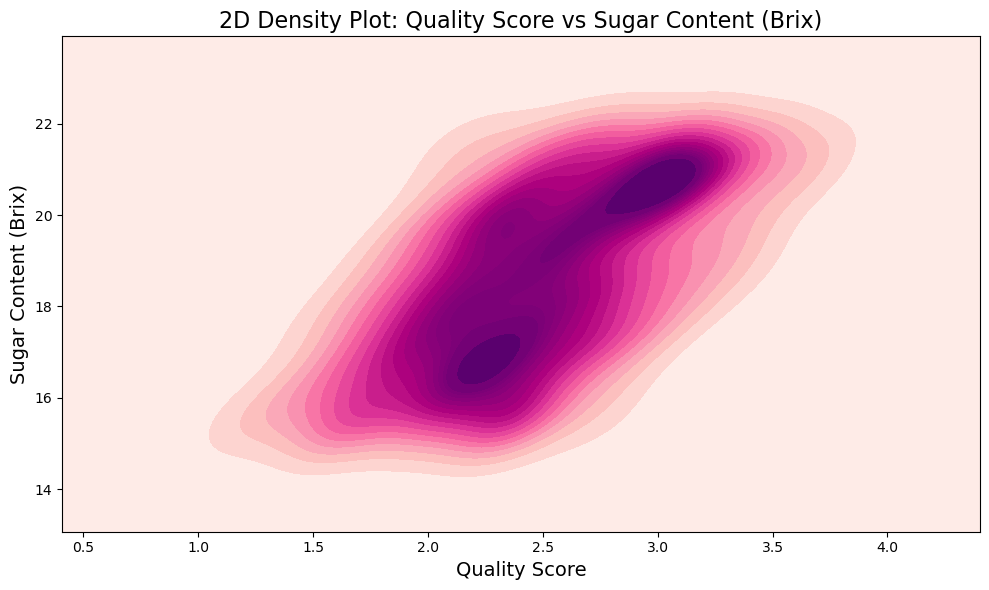

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.kdeplot(
    x='quality_score', 
    y='sugar_content_brix', 
    data=veri, 
    cmap='RdPu', 
    fill=True,    
    thresh=0,    
    levels=20     
)


plt.title("2D Density Plot: Quality Score vs Sugar Content (Brix)", fontsize=16)
plt.xlabel("Quality Score", fontsize=14)
plt.ylabel("Sugar Content (Brix)", fontsize=14)


plt.tight_layout()
plt.show()


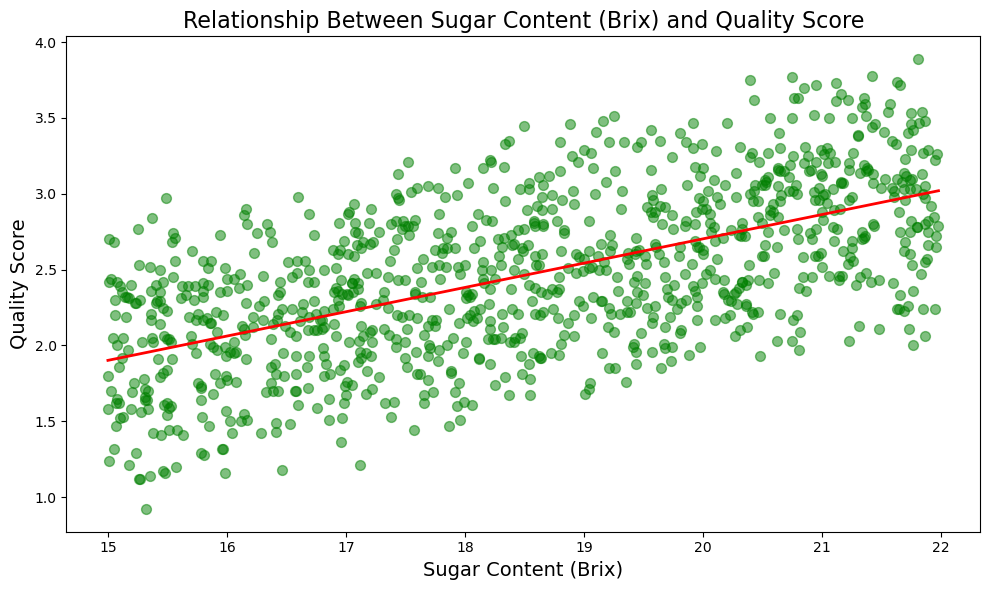

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.regplot(
    x='sugar_content_brix', 
    y='quality_score', 
    data=veri, 
    scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'green'},  
    line_kws={'color': 'red', 'lw': 2},  
    ci=None   
)


plt.title("Relationship Between Sugar Content (Brix) and Quality Score", fontsize=16)
plt.xlabel("Sugar Content (Brix)", fontsize=14)
plt.ylabel("Quality Score", fontsize=14)


plt.tight_layout()
plt.show()


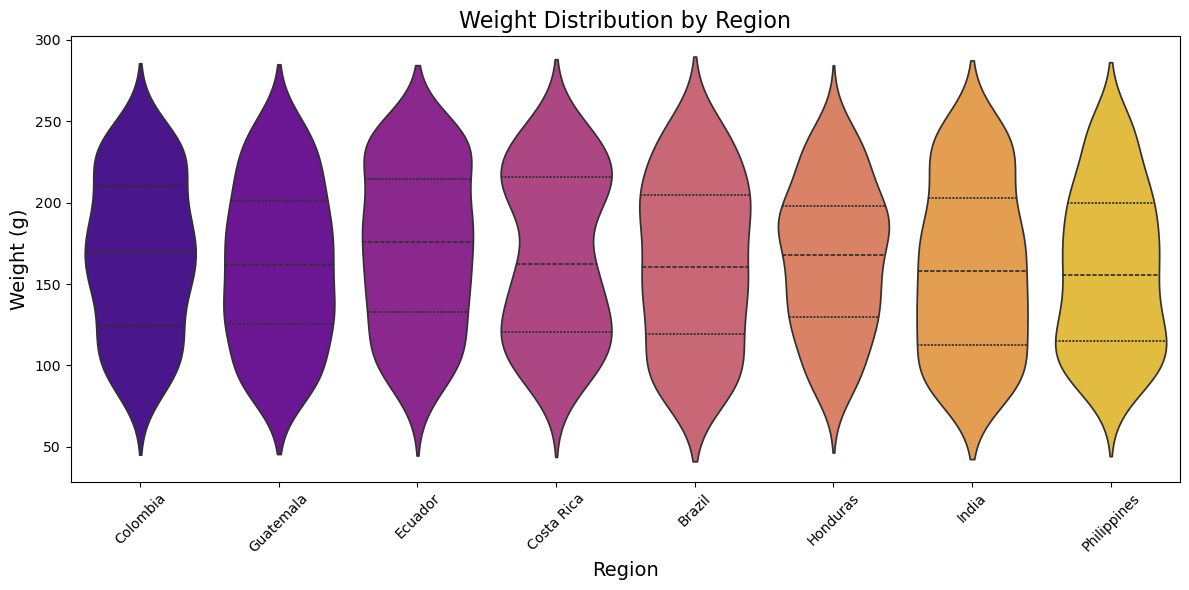

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.violinplot(
    x='region', 
    y='weight_g', 
    data=veri, 
    palette='plasma',   
    inner="quart",       
    scale='count'       
)


plt.title("Weight Distribution by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Weight (g)", fontsize=14)


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [28]:
varieties = veri['variety'].unique()


for variety in varieties:
    print(f"\nVeriler - Tür: {variety}")
    print(veri[veri['variety'] == variety])



Veriler - Tür: Manzano
     sample_id  variety       region  quality_score quality_category  \
0            1  Manzano     Colombia           1.88       Processing   
3            4  Manzano      Ecuador           2.21       Processing   
8            9  Manzano       Brazil           1.82       Processing   
11          12  Manzano   Costa Rica           2.50       Processing   
41          42  Manzano  Philippines           2.60             Good   
..         ...      ...          ...            ...              ...   
945        946  Manzano     Honduras           2.30       Processing   
959        960  Manzano        India           3.30             Good   
963        964  Manzano  Philippines           3.00             Good   
964        965  Manzano   Costa Rica           2.88             Good   
971        972  Manzano   Costa Rica           2.86             Good   

     ripeness_index ripeness_category  sugar_content_brix  firmness_kgf  \
0              2.11           Turnin

In [29]:
average_quality_scores = veri.groupby('variety')['quality_score'].mean()

print(average_quality_scores)


variety
Blue Java      2.523009
Burro          2.507360
Cavendish      2.433008
Fehi           2.428582
Lady Finger    2.532051
Manzano        2.389160
Plantain       2.463425
Red Dacca      2.454867
Name: quality_score, dtype: float64


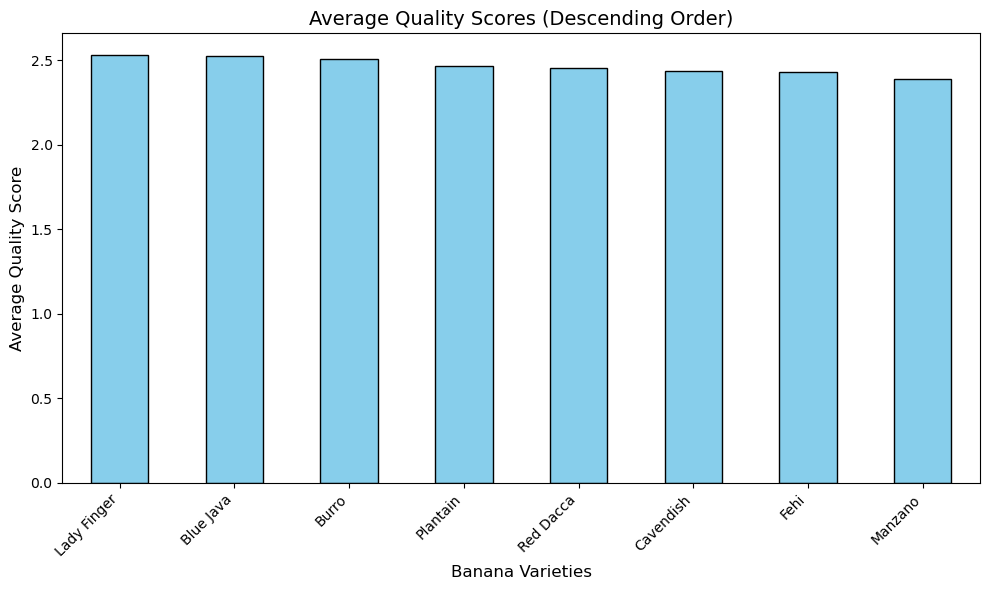

In [30]:
import matplotlib.pyplot as plt


average_quality_scores = veri.groupby('variety')['quality_score'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
average_quality_scores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Quality Scores (Descending Order)", fontsize=14)
plt.xlabel("Banana Varieties", fontsize=12)
plt.ylabel("Average Quality Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


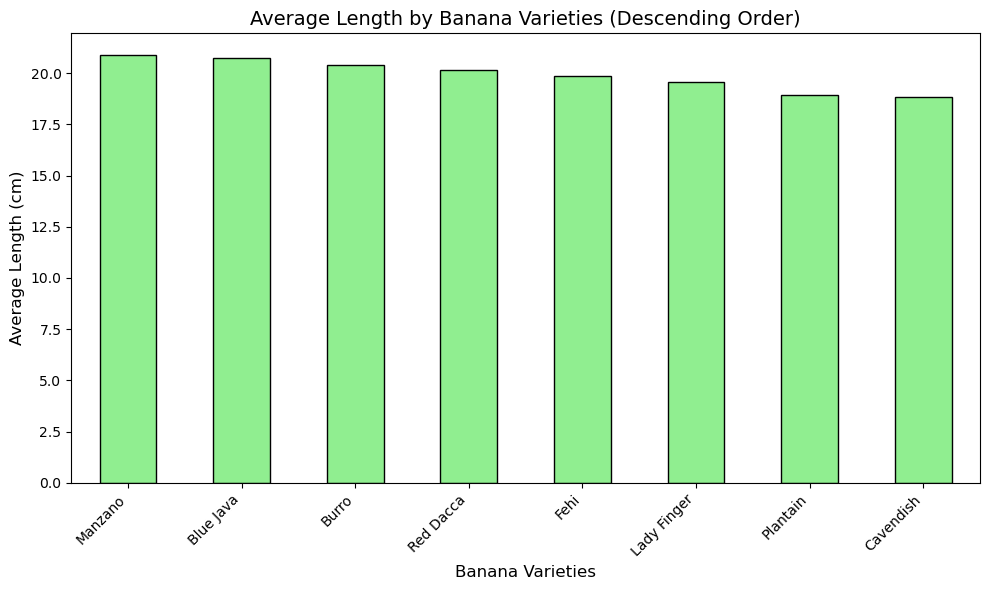

In [31]:
import matplotlib.pyplot as plt

sorted_varieties_by_length = veri.groupby('variety')['length_cm'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_varieties_by_length.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average Length by Banana Varieties (Descending Order)", fontsize=14)
plt.xlabel("Banana Varieties", fontsize=12)
plt.ylabel("Average Length (cm)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


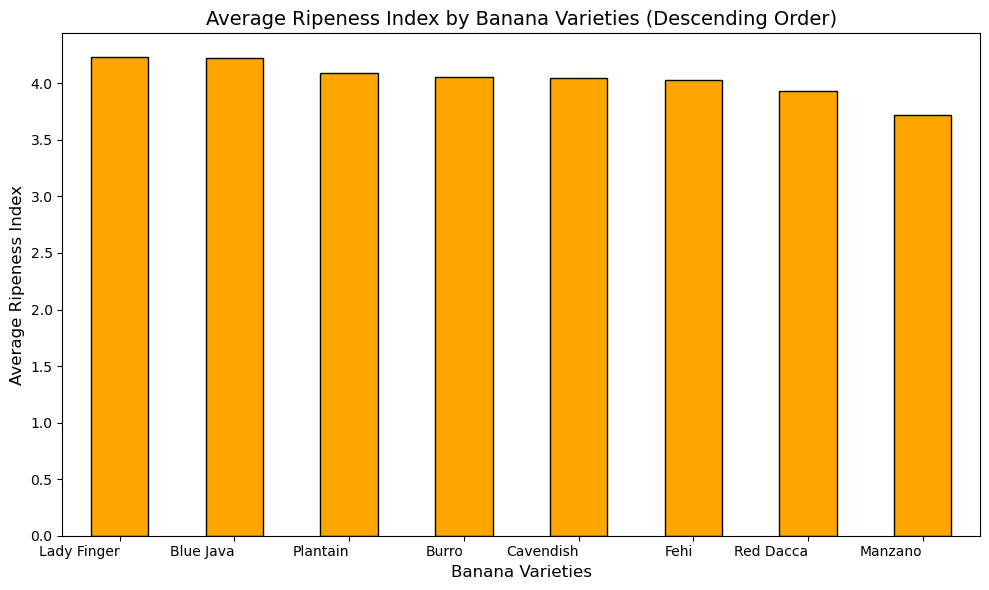

In [32]:
import matplotlib.pyplot as plt

sorted_varieties_by_ripeness = veri.groupby('variety')['ripeness_index'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_varieties_by_ripeness.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Ripeness Index by Banana Varieties (Descending Order)", fontsize=14)
plt.xlabel("Banana Varieties", fontsize=12)
plt.ylabel("Average Ripeness Index", fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


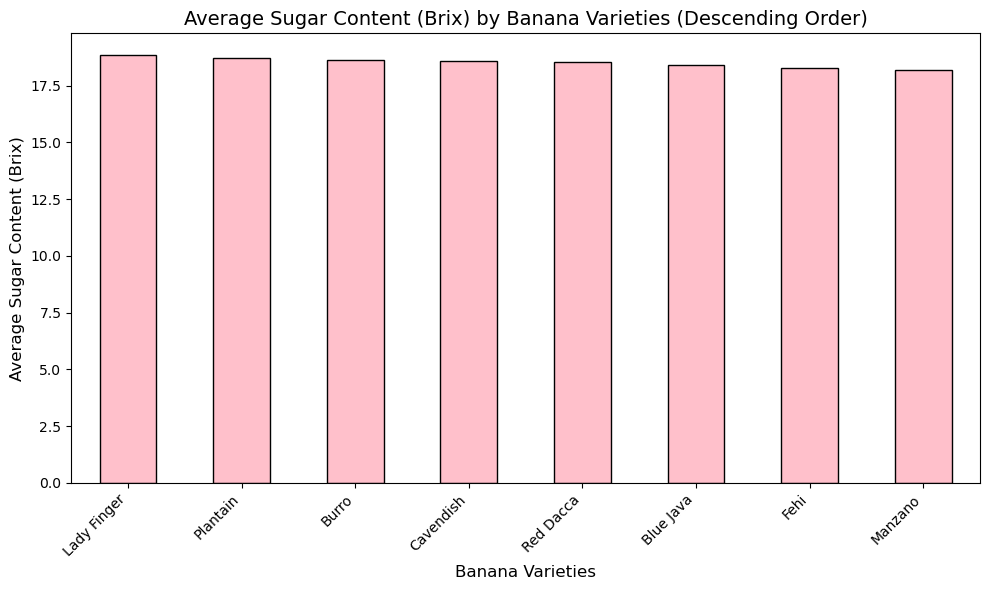

In [33]:
sorted_varieties_by_sugar = veri.groupby('variety')['sugar_content_brix'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sorted_varieties_by_sugar.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Average Sugar Content (Brix) by Banana Varieties (Descending Order)", fontsize=14)
plt.xlabel("Banana Varieties", fontsize=12)
plt.ylabel("Average Sugar Content (Brix)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


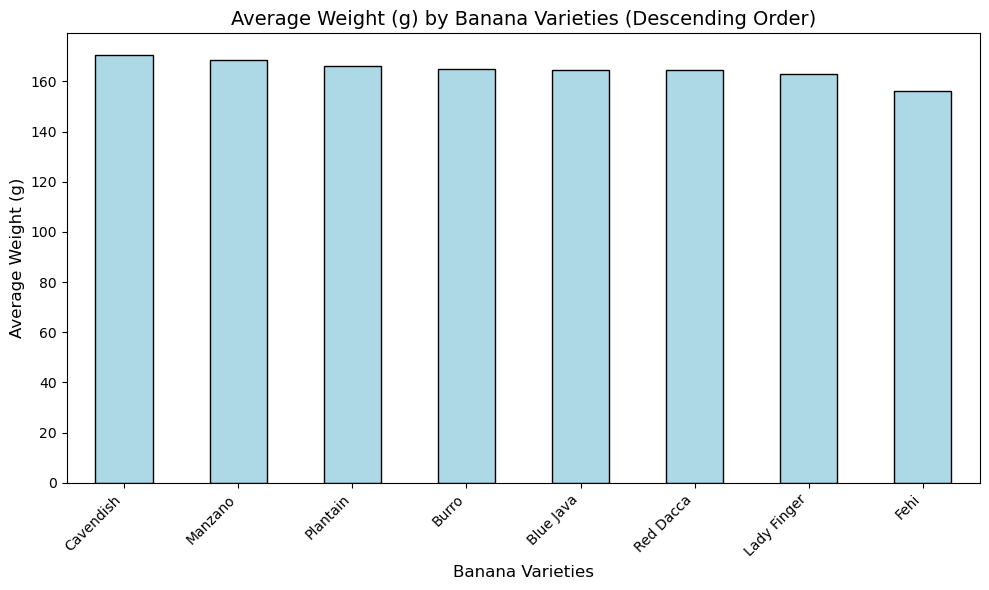

In [34]:

sorted_varieties_by_weight = veri.groupby('variety')['weight_g'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sorted_varieties_by_weight.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Average Weight (g) by Banana Varieties (Descending Order)", fontsize=14)
plt.xlabel("Banana Varieties", fontsize=12)
plt.ylabel("Average Weight (g)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


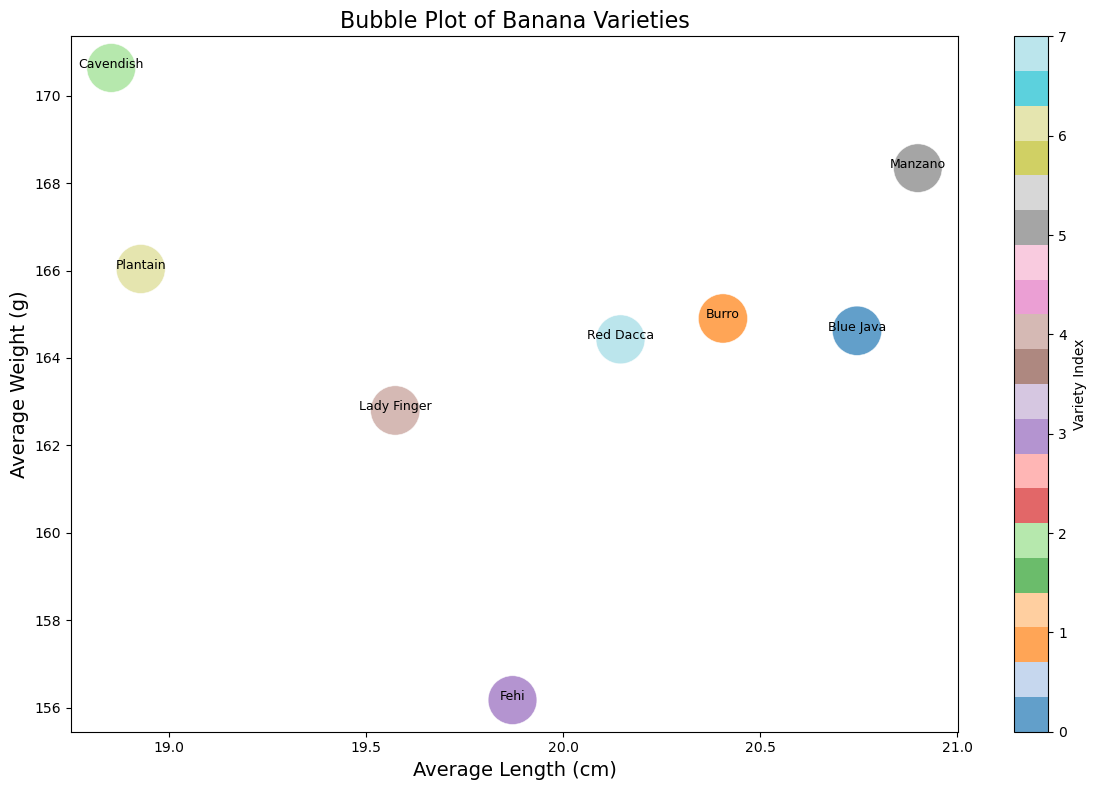

In [35]:
import matplotlib.pyplot as plt
import numpy as np


average_values = veri.groupby('variety').agg({
    'length_cm': 'mean',
    'weight_g': 'mean',
    'quality_score': 'mean'
}).reset_index()

)
average_values['quality_score_log'] = np.log(average_values['quality_score'] + 1)


unique_varieties = average_values['variety'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_varieties))


plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=average_values['length_cm'], 
    y=average_values['weight_g'], 
    s=average_values['quality_score_log'] * 1000,  
    c=np.arange(len(average_values)), 
    cmap='tab20',  
    alpha=0.7, 
    edgecolors='w', 
    linewidth=0.5
)

plt.colorbar(scatter, label='Variety Index')

plt.title("Bubble Plot of Banana Varieties", fontsize=16)
plt.xlabel("Average Length (cm)", fontsize=14)
plt.ylabel("Average Weight (g)", fontsize=14)

for i, txt in enumerate(average_values['variety']):
    plt.annotate(txt, (average_values['length_cm'][i], average_values['weight_g'][i]), fontsize=9, ha='center')

plt.tight_layout()
plt.show()
